#**<center> <h1>IDENTIFICACIÓN DE DAÑO DE RETINA A PARTIR DE IMÁGENES  DE TOMOGRAFÍA DE COHERENCIA ÓPTICA (OCT)</h1> </center>**
<center><img src="https://minas.medellin.unal.edu.co/images/Escudo_color.png" width="300"></center>
<center> <t>Juan Camilo Gomez, Juan David Henao, Ricardo Velásquez Peñaloza, Bladimir Ibarra Granda.<t> </center>



# Introducción
<p style='text-align: justify'> En este proyecto se ha optado por utilizar imágenes de tomografías de coherencia optica, las cuales son tomadas para capturar secciones transversales de alta resolución de las retinas de pacientes.Este tipo de imagenes son ampliamente utilizadas, pues al ser un examen no invasivo, no representa ningun riesgo para el paciente, ademas de estas imágenes se puede observar cada una de las capas de la retina, ayudando de manera significativa al oftalmologo a determinar un diagnostico mediante medidas de grosor y diferentes diagramas utilizados por ellos. Sin embargo, el análisis de este tipo de imágenes requier de personal especializado asi como de una gran cantidad de tiempo para poder obtener resultados, por tanto surge la necesidad de generar una solución desde la visión artificial que permita agilizar el proceso y asi reducir costos y tiempo para poder atender a una mayor cantidad de pacientes.

Para este caso de estudio se tratara de contribuir a esta causa con un algoritmo de clasificación para 4 diagnosticos que se mencionan a continuación:

-Neovascularización coroidea (NVC) con membrana neovascular (CNV)

-Edema macular diabético (DME) con líquido intrarretiniano asociado al engrosamiento de la retina. (DME)

-Múltiples drusas presentes en la DMAE temprana (Drusen)

-Retina normal con contorno foveal conservado y ausencia de líquido / edema retiniano (Normal)
 <p>




<center><img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/categorias.png"></center>

<center><img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/retina.png"></center>

<p style='text-align: justify'> El OCT es uno de los distintos tipos de tomografía que existe en el análisis médico, orientado más que todo a el análisis del sistema óptico humano (Retina), el principal sistema bajo el cual opera un tomógrafo de este estilo es un interferómetro de michelson, junto con luz (comúnmente LED) infrarroja, esto debido a que los tejidos biológicos que componen al humano, absorben poca radiación de fuentes con longitud de onda entre los 700 y 900 nm lo que constituye en una técnica no invasiva muy completa y con resultados rápidos.

El interferómetro de michelson consta de un arreglos de espejos, un divisor de haz de luz y una fuente de luz, para efectos de la tomografía uno de los “espejos” resulta ser el ojo del paciente, donde va a entrar la radiación y nos va a producir una imagen de la retina.

Asociado a la retina nos encontramos con las enfermedades antes mencionadas, normalmente debido a la acumulacion ya sea de lípidos, proteínas o líquidos.
<p>

# ¿ Cómo estamos desarrollando el proyecto?

<center><img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/como.png"></center>

<p style='text-align: justify'>Los datos se toman de Kaggle (Dataset publicado en 2018), apoyados con las librerías numpy y matplotlib se les hace un pre-procesamiento para analizar si se puede obtener imágenes más claras respecto a las enfermedades que se están abordando, una posterior extracción de características se verá más adelante.<p>

#<b>1. ADQUISICIÓN DE IMÁGENES</b>
El conjunto de imágenes a utilizar consta de 84,495 elementos en formato JPG, organizadas en 3 carpetas (Train, Test, Val), y cada una de estas debidamente categorizadas (separadas en subcarpetas) en los 4 diagnosticos mencionados anteriormente (NORMAL, CNV, DME, DRUSEN).

Los datos utilizados para este ejercicio son de caracter publico y estan publicados en el repositorio de datos Kaggle, estos datos fueron tomados de adultos entre el 1 de Julio de 2013 y el 1 de marzo de 2017, de las instituciones:

***Shiley Eye Institute de la Universidad de California en San Diego, California Retinal Research Foundation, Medical Center Ophthalmology Associates, Shanghai First People's Hospital y Beijing Tongren Eye Center)***

Para categorizar estas imagenes se estructuraron 3 filtros de personas capacitadas que evaluaron cada uno de los elementos adquiridos. El primer filtro de calificadores consistio en estudiantes de medicina, los cuales habian cursado y aprobado la materia de análisis de imagenes OCT, estos se encargaron de eliminar imagenes con defectos graves o cuya resolución era demasiado baja. El segundo filtro estaba conformado por 4 oftalmólogos los cuales clasificaron cada una de las imágenes que habian pasado el filtro inicial, identificando drusas, edemas, neovascularización coroidea y otras patologías visibles. Por ultimo, dos especialistas con 20 años de experiencia corroboro las imagenes clasificadas. 
En este proyecto utilizaremos la herramienta de Colab de Google, esto debido a la capacidad de procesamiento que nos permite esta plataforma, para esto iniciamos con un algoritmo que nos permite descargar todos los datos del proyecto directamente de la plataforma Kaggle a Google Colab, agilizando el proceso y sin utilizar los recursos locales de maquina.


Iniciamos instalando la libreria de Kaggle:

In [ ]:
! pip install kaggle

Previamente hemos descargado un archivo tipo JSON de la pagina de Kaggle, este archivo es unico para cada usuario de la plataforma y permite identificarnos directamente mediante codigo, en la siguiente linea importamos dicho archivo:

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bladimiribarragranda","key":"7b08c14abd9e09e5cdc034f80de00764"}'}

En las siguientes lineas copiamos el archivo y generamos un directorio dentro de Colab, para poder operar con los algoritmos de Kaggle:

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Conceder permisos de lectura y escritura.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Dentro de cada proyecto de Kaggle podemos encontrar un codigo que una vez instalada la libreria de Kaggle en python nos permite descargar directamente los datos del proyecto en archivos comprimidos, a continuación ejecutamos el comando para nuestros datos:

In [ ]:
! kaggle datasets download -d paultimothymooney/kermany2018

100% 10.8G/10.8G [04:20<00:00, 61.7MB/s]
100% 10.8G/10.8G [04:20<00:00, 44.7MB/s]


Tenemos entonces un archivo comprimido de 10.8 G, sin embargo, necesitamos descomprimirlo para poder acceder a cada una de las imagenes, para esto necesitamos utilizar la libreria Zipfile, que nos permite manipular este tipo de archivo, ademas de la libreria io que permite realizar operaciones con archivos y sus direcciones (path).

En la siguiente linea descomprimimos el archivo en cuestión:

In [ ]:
import zipfile
import io
localzip='/content/kermany2018.zip'
data=zipfile.ZipFile(localzip,'r')
data.extractall()

Una vez descomprimimos el archivo procedemos a importar algunas librerias importantes, primero CV2, la cual nos permite manipular imagenes y hacer operacones con ellas. La libreria numpy con la cual hacemos operaciones con matrices (imagenes). La libreria OS con la que manipulamos archivos desde sus directorios, lo cual es muy util para grandes cantidades de imagenes y la libreria Matplotlib con la que podemos graficar las imagenes. A continuación importamos las librerias anteriormente mencionadas y definimos los directorios de las carpetas tanto de entreno y de testeo para cada una de las categorias que tenemos.

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_cnv_train='/content/OCT2017 /train/CNV'
ruta_dme_train='/content/OCT2017 /train/DME'
ruta_drusen_train='/content/OCT2017 /train/DRUSEN'
ruta_normal_train='/content/OCT2017 /train/NORMAL'

ruta_cnv_test='/content/OCT2017 /test/CNV'
ruta_dme_test='/content/OCT2017 /test/DME'
ruta_drusen_test='/content/OCT2017 /test/DRUSEN'
ruta_normal_test='/content/OCT2017 /test/NORMAL'


Posteriormente con la libreria OS definimos los directorios como objetos path, esto agilizara varios procesos:

In [ ]:
# Directorio con las imagenes de CNV
train_cnv_dir = os.path.join(ruta_cnv_train)
test_cnv_dir = os.path.join(ruta_cnv_test)

# Directorio con las imagenes de dme
train_dme_dir = os.path.join(ruta_dme_train)
test_dme_dir = os.path.join(ruta_dme_test)

# Directorio con las imagenes de drusen
train_drusen_dir = os.path.join(ruta_drusen_train)
test_drusen_dir = os.path.join(ruta_drusen_test)

# Directorio con las imagenes de normal
train_normal_dir = os.path.join(ruta_normal_train)
test_normal_dir = os.path.join(ruta_normal_test)

### Análisis Exploratorio de las Imágenes

Iniciamos observando los nombres de los archivos para cada una de las categorias, para esto es muy util utilizar la función listdir de la libreria os, la cual convierte los nombres de los archivos contenidos en un directorio en elementos de una lista:

In [ ]:
#Nombres imagenes CNV
train_cnv_nombres = os.listdir(train_cnv_dir)
print(train_cnv_nombres[:10])
test_cnv_nombres = os.listdir(test_cnv_dir)
print(test_cnv_nombres[:10])

#Nombres imagenes DME
train_dme_nombres = os.listdir(train_dme_dir)
print(train_dme_nombres[:10])
test_dme_nombres = os.listdir(test_dme_dir)
print(test_dme_nombres[:10])

#Nombres imagenes DRUSEN
train_drusen_nombres = os.listdir(train_drusen_dir)
print(train_drusen_nombres[:10])
test_drusen_nombres = os.listdir(test_drusen_dir)
print(test_drusen_nombres[:10])

#Nombres imagenes NORMAL
train_normal_nombres = os.listdir(train_normal_dir)
print(train_normal_nombres[:10])
test_normal_nombres = os.listdir(test_normal_dir)
print(test_normal_nombres[:10])

['CNV-2724152-11.jpeg', 'CNV-3947605-27.jpeg', 'CNV-6666538-71.jpeg', 'CNV-732516-152.jpeg', 'CNV-6569286-33.jpeg', 'CNV-7487279-5.jpeg', 'CNV-7487279-32.jpeg', 'CNV-7907754-221.jpeg', 'CNV-9997680-251.jpeg', 'CNV-4907724-40.jpeg']
['CNV-4283050-2.jpeg', 'CNV-163081-5.jpeg', 'CNV-338282-1.jpeg', 'CNV-4464785-1.jpeg', 'CNV-1130960-1.jpeg', 'CNV-5594757-2.jpeg', 'CNV-1083927-1.jpeg', 'CNV-5409617-1.jpeg', 'CNV-5760454-1.jpeg', 'CNV-172472-5.jpeg']
['DME-3447259-12.jpeg', 'DME-3531101-31.jpeg', 'DME-2817912-4.jpeg', 'DME-916226-1.jpeg', 'DME-633268-27.jpeg', 'DME-7928636-12.jpeg', 'DME-465734-3.jpeg', 'DME-30521-16.jpeg', 'DME-8854246-1.jpeg', 'DME-7585263-24.jpeg']
['DME-8729675-1.jpeg', 'DME-6716735-2.jpeg', 'DME-8231523-1.jpeg', 'DME-7870558-2.jpeg', 'DME-30521-2.jpeg', 'DME-7983936-1.jpeg', 'DME-15208-1.jpeg', 'DME-5981434-1.jpeg', 'DME-8525575-5.jpeg', 'DME-8200056-2.jpeg']
['DRUSEN-228939-20.jpeg', 'DRUSEN-5434336-20.jpeg', 'DRUSEN-732516-85.jpeg', 'DRUSEN-7763772-53.jpeg', 'DRUSEN-

Ademas de esto con la lista ya creada, podemos ver que tantas imagenes de entrenamiento y testeo tenemos por cada categoria:

In [ ]:
#Imprimir la cantidad de imagenes
print('Imagenes entrenamiento CNV:', len(train_cnv_nombres))
print('Imagenes prueba CNV:', len(test_cnv_nombres))

print('Imagenes entrenamiento DME:', len(train_dme_nombres))
print('Imagenes prueba DME:', len(test_dme_nombres))

print('Imagenes entrenamiento DRUSEN:', len(train_drusen_nombres))
print('Imagenes prueba DRUSEN:', len(test_drusen_nombres))

print('Imagenes entrenamiento NORMAL:', len(train_normal_nombres))
print('Imagenes prueba NORMAL:', len(test_normal_nombres))

print("En total nuestro dataset consiste de {} imágenes".format(len(train_cnv_nombres) + len(train_dme_nombres)+ len(train_drusen_nombres) + len(train_normal_nombres)))


Imagenes entrenamiento CNV: 37205
Imagenes prueba CNV: 242
Imagenes entrenamiento DME: 11348
Imagenes prueba DME: 242
Imagenes entrenamiento DRUSEN: 8616
Imagenes prueba DRUSEN: 242
Imagenes entrenamiento NORMAL: 26315
Imagenes prueba NORMAL: 242
En total nuestro dataset consiste de 83484 imágenes


Ahora procedemos a visualizar algunas imagenes del set de datos, para esto usaremos la libreria matplotlb, ademas de la libreria OS, con la cural apoyados en una ciclo for simple (list comprenhension), generaremos listas de 4 imagenes para cada directorio se leccionado y posteriormente crearemos un grafico de 16 imagenes donde se mostraran 4 imagenes por cada carpeta.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

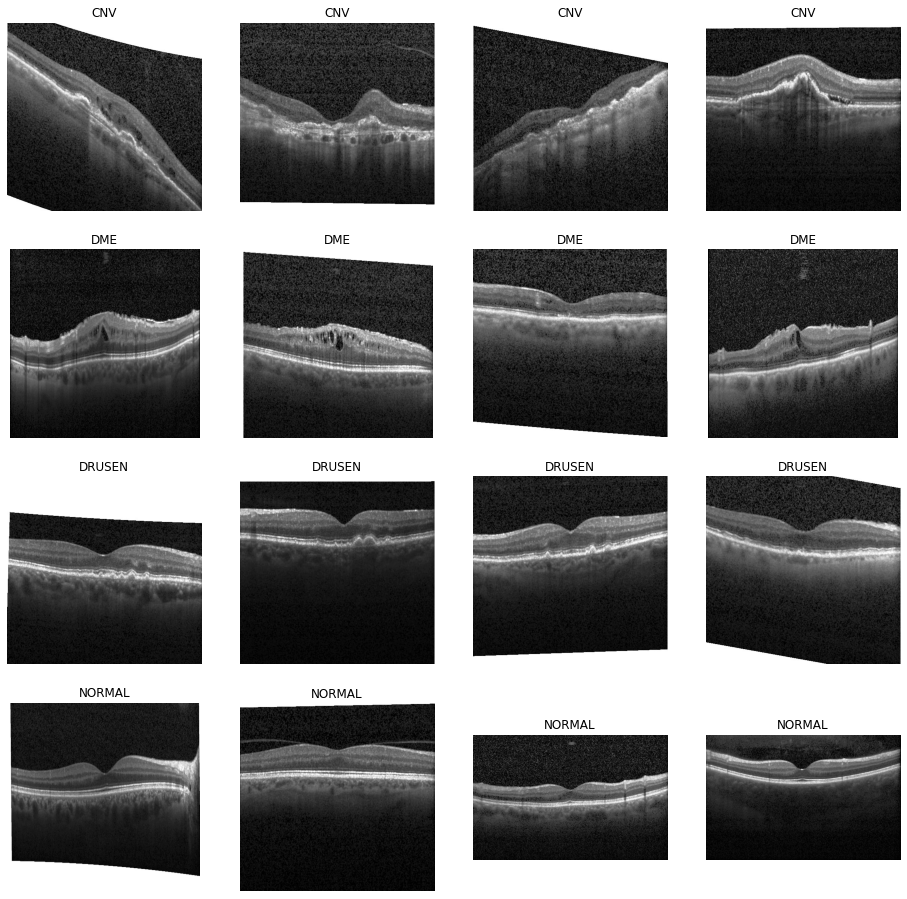

In [ ]:
pic_index=0
fig = plt.gcf()
fig.set_size_inches(16, 16)

pic_index += 4
next_cnv_pic = [os.path.join(train_cnv_dir, fname) 
                for fname in train_cnv_nombres[pic_index-4:pic_index]]
next_dme_pic = [os.path.join(train_dme_dir, fname) 
                for fname in train_dme_nombres[pic_index-4:pic_index]]
next_drusen_pic = [os.path.join(train_drusen_dir, fname) 
                for fname in train_drusen_nombres[pic_index-4:pic_index]]
next_normal_pic = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_nombres[pic_index-4:pic_index]]

for i, img_path in enumerate(next_cnv_pic+next_dme_pic+next_drusen_pic+next_normal_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img,cmap='Greys_r')
  if i<4:
    plt.title('CNV')
  if i>=4 and i<8:
    plt.title('DME')
  if i>=8 and i<12:
    plt.title('DRUSEN')
  if i>=12 and i<16:
    plt.title('NORMAL')


plt.show()

Ahora que pudimos visualizar las imagenes que poseemos, miremos la forma de una de ellas, para saber cuantos canales tenomos disponibles.

(496, 512)


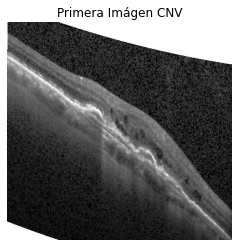

In [ ]:
ima=os.path.join(train_cnv_dir, train_cnv_nombres[0])
img_cnv = mpimg.imread(ima)

plt.imshow(img_cnv,cmap='Greys_r')
plt.title('Primera Imágen CNV')
plt.axis('off')
print(img_cnv.shape)

### Modelo de color de Escala de Grises
Notemos que nuestras imagenes de un solo canal, con valores de intensidad en cada pixel, por tanto no corresponde a ningun modelo de color, una cosa que podemos intentar hacer para diferenciar mejor algunos rangos, es generar un pseudocolor y aplicarlo, a continuación se muestra este proceso:

#<b>2. PREPROCESAMIENTO DE LAS IMÁGENES </b>

Para continuar con nuestro proyecto iniciaremos con los pasos basicos de preprocesamiento de imágenes, por tanto, empezamos eligiendo 1 imagen por categoria y mostramos sus histogramas, para mirar su comportamiento general

(-0.5, 511.5, 495.5, -0.5)

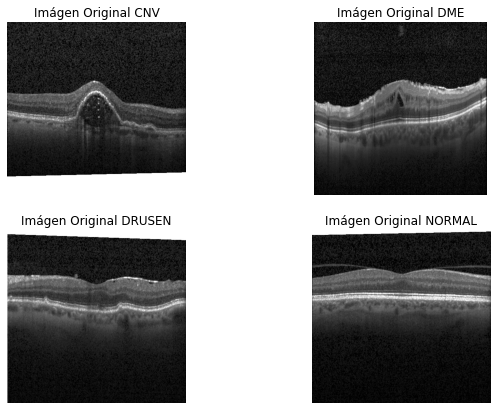

In [ ]:
ima1=os.path.join(train_cnv_dir, train_cnv_nombres[456])
img_cnv = mpimg.imread(ima1)

ima2=os.path.join(train_dme_dir, train_dme_nombres[0])
img_dme = mpimg.imread(ima2)

ima3=os.path.join(train_drusen_dir, train_drusen_nombres[122])
img_drusen = mpimg.imread(ima3)

ima4=os.path.join(train_normal_dir, train_normal_nombres[1])
img_normal= mpimg.imread(ima4)

plt.figure(figsize=(10,7))                                                                       

plt.subplot(2,2,1)
plt.imshow(img_cnv,cmap='Greys_r')                                               
plt.title('Imágen Original CNV')
plt.axis('off')                

plt.subplot(2,2,2)
plt.imshow(img_dme,cmap='Greys_r')
plt.title('Imágen Original DME')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img_drusen,cmap='Greys_r')
plt.title('Imágen Original DRUSEN')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img_normal,cmap='Greys_r')
plt.title('Imágen Original NORMAL')
plt.axis('off')


Para comparar los histogramas de cada imágen generamos una figura que se muestra a continuación:

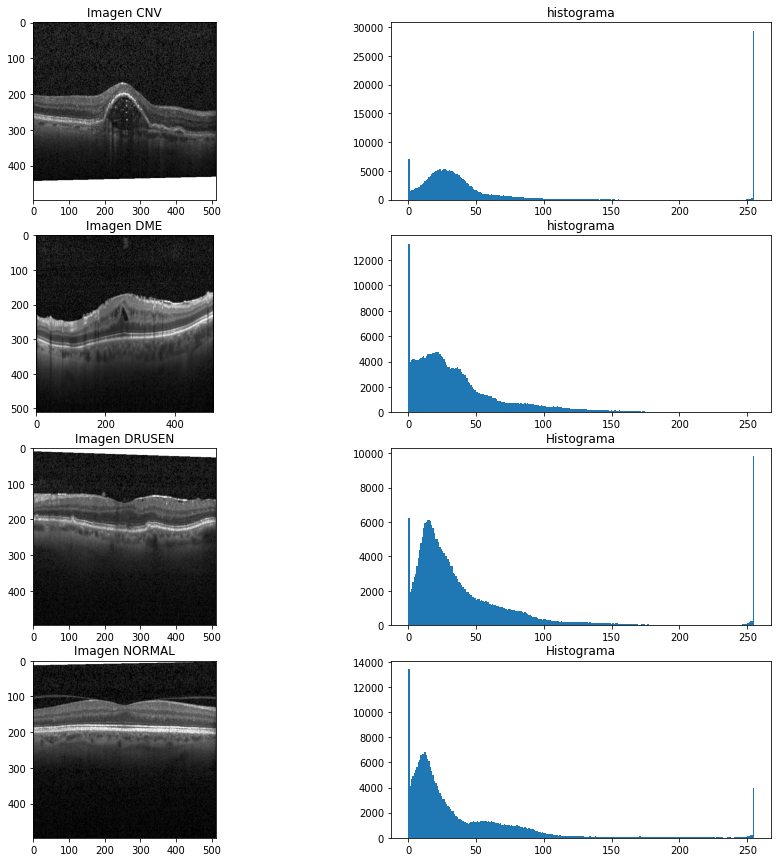

In [ ]:
#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(4,2, figsize=(15, 15))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Imagen CNV')
#Imprimir la imagen 1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(img_cnv,cmap='Greys_r')
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(img_cnv.ravel(), bins=256, range=(0.0, 255.0))    

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
arreglo_plots[1,0].set_title('Imagen DME')
arreglo_plots[1,0].imshow(img_dme,cmap='Greys_r')
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(img_dme.ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[2,0].set_title('Imagen DRUSEN')
arreglo_plots[2,0].imshow(img_drusen,cmap='Greys_r')
arreglo_plots[2,1].set_title('Histograma')
_ = arreglo_plots[2,1].hist(img_drusen.ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('Imagen NORMAL')
arreglo_plots[3,0].imshow(img_normal,cmap='Greys_r')
arreglo_plots[3,1].set_title('Histograma')
_ = arreglo_plots[3,1].hist(img_normal.ravel(), bins=256, range=(0.0, 255.0))

Notemos que en general las imágenes son de tonos oscuros, esto se refleja en el histograma, donde en todas ellas existe un pico en el color negro, el cual predomina en todas las imagenes, por tanto hace ver como si no existiese contraste en la imágen, sin embargo, si quitamos el análisis al color negro, vemos que si existe contraste y hay distribución de los colores.

En busqueda de destacar caracteristicas en las imágenes, aplicaremos algunas transformaciones a 4 imágenes de las respectivas 4 categorías de imágenes del dataset, con esto vemos el efecto que se produce y posteriormente decidimos que operación aplicar a todas las imagenes, para destacar sus caracteristicas.

## <b>2.1 TRANSFORMACIONES DE LA IMAGEN</b>

A continuación se aplicarán algunas transformaciones a las imágenes con el fín de mejorar la calidad de las mismas


#### <em><b>2.1.1. Corrección Gamma</b></em>
La corrección gamma es empleada para corregir el brillo de una imágen usando una transformación no lineal. La fórmula matemática que aplica es:

<center><img src="https://i2.wp.com/www.dfstudios.co.uk/wp-content/uploads/2014/02/form_gam.png?resize=146%2C40"></center>

Gráficamente la curva que describe esta transformación:
<center><img src="https://i0.wp.com/www.dfstudios.co.uk/wp-content/uploads/2014/02/graph_gam.png?w=948&ssl=1" width="600"></center>




In [ ]:
def gamma_correction(img, a, gamma): # Se declara la función que aplica la corrección Gamma a las imágenes.
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    #plt.imshow(res, cmap='Greys_r')
    
    return res

In [ ]:
# Se declara esta función para graficar un mosaico de imágenes 4x4 

def plot_4x4_gamma(cnv, dme, drusen, normal):
  
  gamma= 0.5     # Parámetro de la función Gamma
  contador = 1

  plt.figure(figsize=(16,16))
  for i in range(1, 17):

      # Manejo de las filas del mosaico
      if contador<=4:
        img=cnv
        etiqueta= "CNV"
      elif contador<=8:
        img= dme
        etiqueta= "DME"
      elif contador<=12:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"
        
      img = cv2.resize(img, (256, 256)) # Re-establecer el tamaño de las imágenes
      
      # Manejo de las columnas del mosaico
      if i in (1, 5, 9, 13):
        plt.subplot(4, 4, i)
        plt.imshow(img, cmap="Greys_r") # Graficar las imágenes originales
        plt.title("Imágen Original {}".format(etiqueta))
        plt.axis('off')
      elif i in (2, 6, 10, 14):
        plt.subplot(4, 4, i)
        plt.hist(img.ravel(), bins=255, range=(0.0, 255.0))
        plt.title("Histograma Original {}".format(etiqueta))

      elif i in (3, 7, 11, 15):
        plt.subplot(4, 4, i)
        plt.imshow(gamma_correction(img, 1, gamma), cmap="Greys_r")
        plt.axis('off')
        plt.title("Imágen Original {}".format(etiqueta))
      else:
        plt.subplot(4, 4, i)
        plt.hist(gamma_correction(img, 1, gamma).ravel(), bins=255, range=(0.0, 255.0))
        plt.title("Histograma Corr. Gamma {}".format(etiqueta))

      contador=contador+1




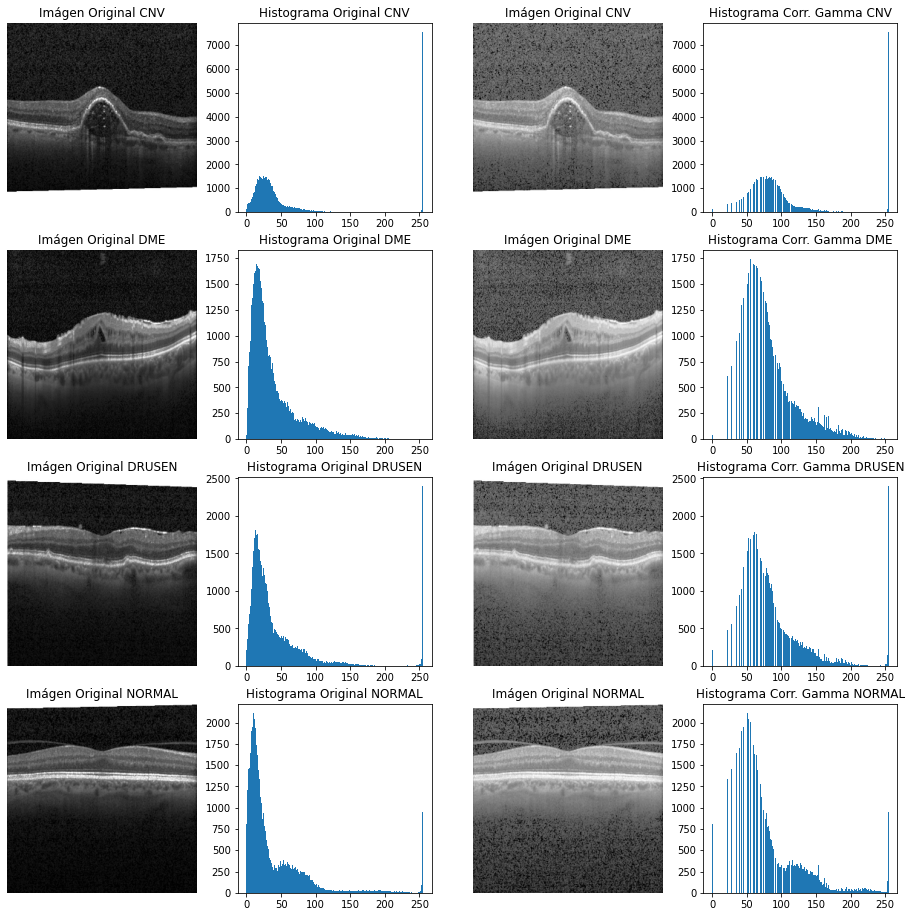

In [ ]:
plot_4x4_gamma(img_cnv, img_dme, img_drusen, img_normal)

### <em><b>2.1.2. Ecualización del Histrograma</b></em>

Este método generalmente aumenta el contraste global de las imágenes y lo consigue distribuyendo de forma eficaz los valores de intensidad más frecuentes, es decir, ampliando el rango de intensidad de la imagen.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Histogrammeinebnung.png/300px-Histogrammeinebnung.png"></center>

In [ ]:
def plot_4x4_ecualizacion(cnv, dme, drusen, normal):
  
  contador = 1
  plt.figure(figsize=(16,16))
  for i in range(1, 17):

      # Control de las filas del mosaico
      if contador<=4:
        img=cnv
        etiqueta= "CNV"
      elif contador<=8:
        img= dme
        etiqueta= "DME"
      elif contador<=12:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"
        
      img = cv2.resize(img, (256, 256)) # Re-establecer el tamaño de las imágenes
      
      # Control de las columnas del mosaico
      if i in (1, 5, 9, 13):
        plt.subplot(4, 4, i)
        plt.imshow(img, cmap="Greys_r") # Imágenes Originales
        plt.axis('off')
        plt.title("Imágen Original {}".format(etiqueta))
      elif i in (2, 6, 10, 14):
        plt.subplot(4, 4, i)
        plt.hist(img.ravel(), bins=255, range=(0.0, 255.0)) # Histograma de las imágenes originales
        plt.title("Histograma Original {}".format(etiqueta))
      
      elif i in (3, 7, 11, 15):
        plt.subplot(4, 4, i)
        plt.imshow(cv2.equalizeHist(img), cmap="Greys_r") # Imágenes con histograma ecualizado
        plt.axis('off')
        plt.title("Imágen Ecualizada {}".format(etiqueta)) 
      else:
        plt.subplot(4, 4, i)
        plt.hist(cv2.equalizeHist(img).ravel(), bins=255, range=(0.0, 255.0)) # Histograma Ecualizado
        plt.title("Histograma Ecualizado {}".format(etiqueta))  

      contador=contador+1

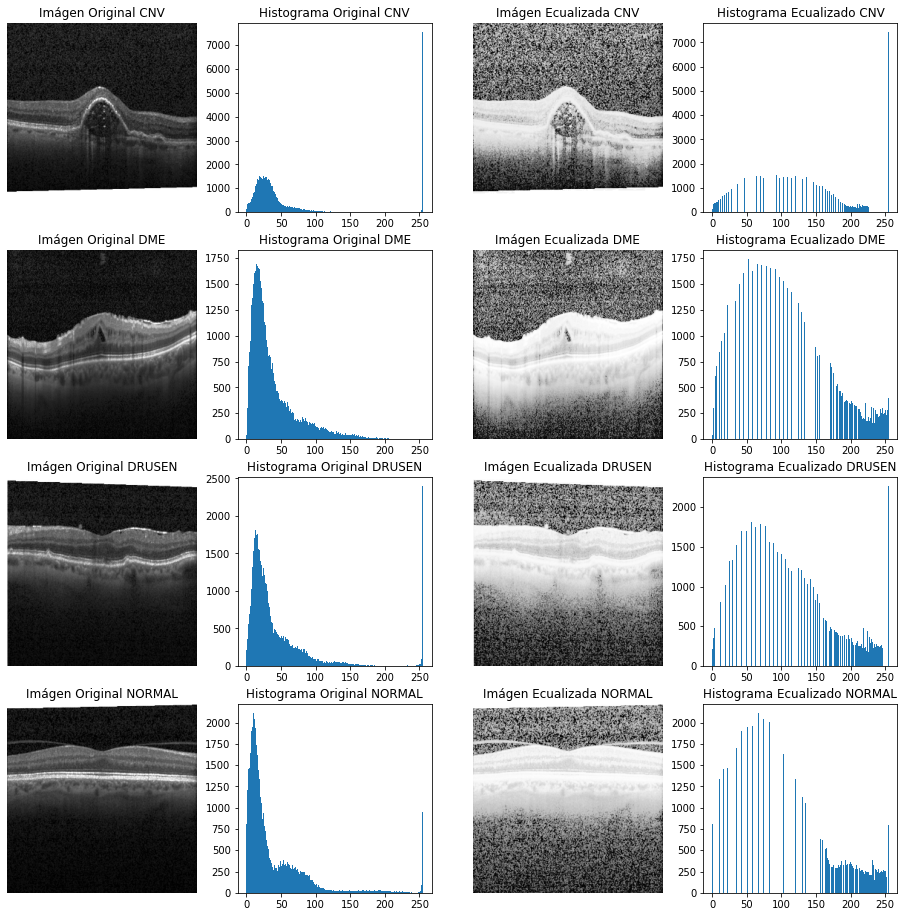

In [ ]:
plot_4x4_ecualizacion(img_cnv, img_dme, img_drusen, img_normal)


A partir de esta operación se obtiene un espectro más amplio de los valores de intensidad de las imagenes en escala de grises, sin embargo se puede ver que se pierden detalles importantes de las imagen y el ruido de las mismas se intensifica.

### <em><b>2.1.3. Ecualización del histograma con límite de contraste </b></em>

Este método impone un límite al contraste de la imágen y a diferencia de la ecualización de histograma ordinaria calcula varios histogramas, cada uno correspondiente a una sección distinta de la imagen, y los utiliza para redistribuir los valores de luminosidad de la imagen. Este método además previene un poco la intensificación del ruido de la imágen
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Clahe-redist.svg/300px-Clahe-redist.svg.png"></center>

In [ ]:
def clhe(img): 
  clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
  # ClipLimit --> Es un factor que evita la sobresaturación de la imagen específicamente en áreas homogéneas (picos en el histograma)
  # tileGridSize --> Número de cuadrículas rectangulares en las que se divide la imagen para calcular histogramas independientes.
  
  cl1 = clahe.apply(img)
  return cl1

In [ ]:
# Graficar un mosaico de imágenes 4x4 en donde se observa las diferencias al aplicar la Ecualización con L.C
def plot_4x4_ecualizacion_limite_contraste(cnv, dme, drusen, normal):
  
  # Control de las filas del mosaico
  contador = 1
  plt.figure(figsize=(16,16))
  for i in range(1, 17):
      if contador<=4:
        img=cnv
        etiqueta= "CNV"
      elif contador<=8:
        img= dme
        etiqueta= "DME"
      elif contador<=12:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"

      img = cv2.resize(img, (256, 256))

      # Control de las columnas del mosaico

      if i in (1, 5, 9, 13):
        plt.subplot(4, 4, i)
        plt.imshow(img, cmap="Greys_r") # imágenes originales
        plt.axis('off')
        plt.title("Imágen Original {}".format(etiqueta)) 
      elif i in (2, 6, 10, 14):
        plt.subplot(4, 4, i)
        plt.hist(img.ravel(), bins=255, range=(0.0, 255.0)) # Histograma de las imágenes originales
        plt.title("Histograma Original {}".format(etiqueta)) 
      
      elif i in (3, 7, 11, 15):
        plt.subplot(4, 4, i)
        plt.imshow(clhe(img), cmap="Greys_r") # Ecualización de histograma con límite de contraste
        plt.axis('off')
        plt.title("Ecualización L. Contraste {}".format(etiqueta))
      else:
        plt.subplot(4, 4, i)
        plt.hist(clhe(img).ravel(), bins=255, range=(0.0, 255.0))  # Histograma ecualizado con limite de contraste
        plt.title("Histograma CLHE {}".format(etiqueta)) 

      contador=contador+1


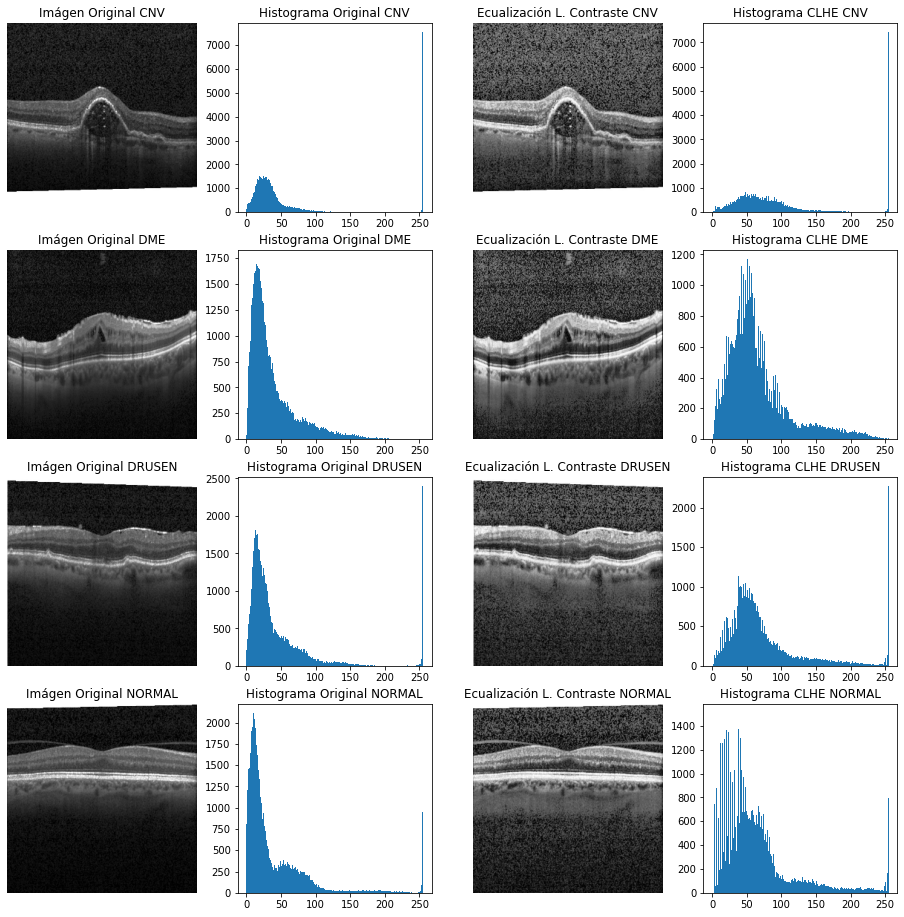

In [ ]:
plot_4x4_ecualizacion_limite_contraste(img_cnv, img_dme, img_drusen, img_normal)

El método de transformación de la imágen que mejor realzó el contraste de las imágenes fue la ecualización del <b>histograma con límite de contraste (CLAHE) </b>. Permitiendo incluso la visualización de algunos rasgos que en la imagen original no se visualizaban muy bien. 

## <b>2.2 FILTROS PARA DISMINUCIÓN DE RUIDO<b>

Como se puede observar las imágenes presentan ruido que se pronuncia en mayor medida por la aplicación de las diferentes operaciones anteriores.

### <em><b>2.2.1. Filtro de la Media</b></em>
Este filtro lo que hace es reemplazar el valor de la cada píxel por el promedio de los valores de los píxeles vecinos en el entorno del kernel.





In [ ]:
def apply_filtro_media(img):
  k_size= 5
  filtro_media= cv2.blur(img, (k_size, k_size))

  return filtro_media


### <em><b>2.2.2. Filtro Gaussiano</b></em>
El filtro gaussiano se emplea para eliminar ruido y suavizar imágenes. Su función 2D está dada por la siguiente función:

<center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/81e90d18be9d92af6ea7683171bb07b2f3119bca" width="250"> </center>


Una aproximación discreta de la anterior función es el kernel:
<center><img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gausmask.gif" width="200"></center>



In [ ]:
def apply_filtro_gaussiano(img):
  k_size= 5
  filtro_gaussiano= cv2.GaussianBlur(img, (k_size, k_size), 2)
  return filtro_gaussiano

### <em><b>2.2.3. Filtro Promedio No Local</b></em> 

A diferencia de los anteriores filtros que utilizan información local para alterar la imagen, el filtro de promediado no-local utiliza toda la imagen para la eliminación de ruido y suavizado de la imagen. Básicamente consisten en que busca bloques similares en la imagen para promediar el ruido y aplicarlo a la imagen.

<center> <img src="https://docs.opencv.org/3.2.0/nlm_patch.jpg"> </center> 

In [ ]:
def apply_promedio_no_local(img):
  img= img.astype(np.uint8)

  img_size=np.shape(img)
  empty_img= np.zeros(img_size, dtype= np.uint8)
  img_dnoised= cv2.fastNlMeansDenoising(img, empty_img, 30, 7, 21) ##Aplicando Filtro contra Ruido primero
  
  return img_dnoised

In [ ]:
# Graficar mosaico 4x4 para mostrar el efecto de los filtros de disminución de ruido en la imágen
def plot_4x4_disminuir_ruido(cnv, dme, drusen, normal):
  
  k_size= 5

  contador = 1
  plt.figure(figsize=(16,16))
  for i in range(1, 17):
      # Control de las filas del mosaico
      if contador<=4:
        img=cnv
        etiqueta= "CNV"
      elif contador<=8:
        img= dme
        etiqueta= "DME"
      elif contador<=12:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"

      img = cv2.resize(img, (256, 256)) # Re-establecer el tamaño de las imágenes

      # Control de las columnas del mosaico 

      if i in (1, 5, 9, 13):
        plt.subplot(4, 4, i)
        plt.imshow(clhe(img), cmap="Greys_r") # Imágen ecualizada con límite de contraste
        plt.title("Img. Ecualizada L.C {}".format(etiqueta))
        plt.axis('off')
      elif i in (2, 6, 10, 14):
        plt.subplot(4, 4, i)
        plt.imshow(apply_filtro_media(clhe(img)), cmap='Greys_r') #  Imágen ecualizada con límite de contraste con Filtro de Media
        plt.title("Filtro de la Media {}".format(etiqueta))
        plt.axis('off')

      elif i in (3, 7, 11, 15):
        plt.subplot(4, 4, i)
        plt.imshow(apply_filtro_gaussiano(clhe(img)), cmap="Greys_r") #  Imágen ecualizada con límite de contraste con Filtro de Gauss
        plt.title("Filtro de Gauss {}".format(etiqueta))
        plt.axis('off')

      else:
        plt.subplot(4, 4, i)
        plt.imshow(apply_promedio_no_local(clhe(img)), cmap="Greys_r")  #   Imágen ecualizada con límite de contraste con Promedio No Local
        plt.title("Filtro Promedio No-Local {}".format(etiqueta))
        plt.axis('off')

      contador=contador+1


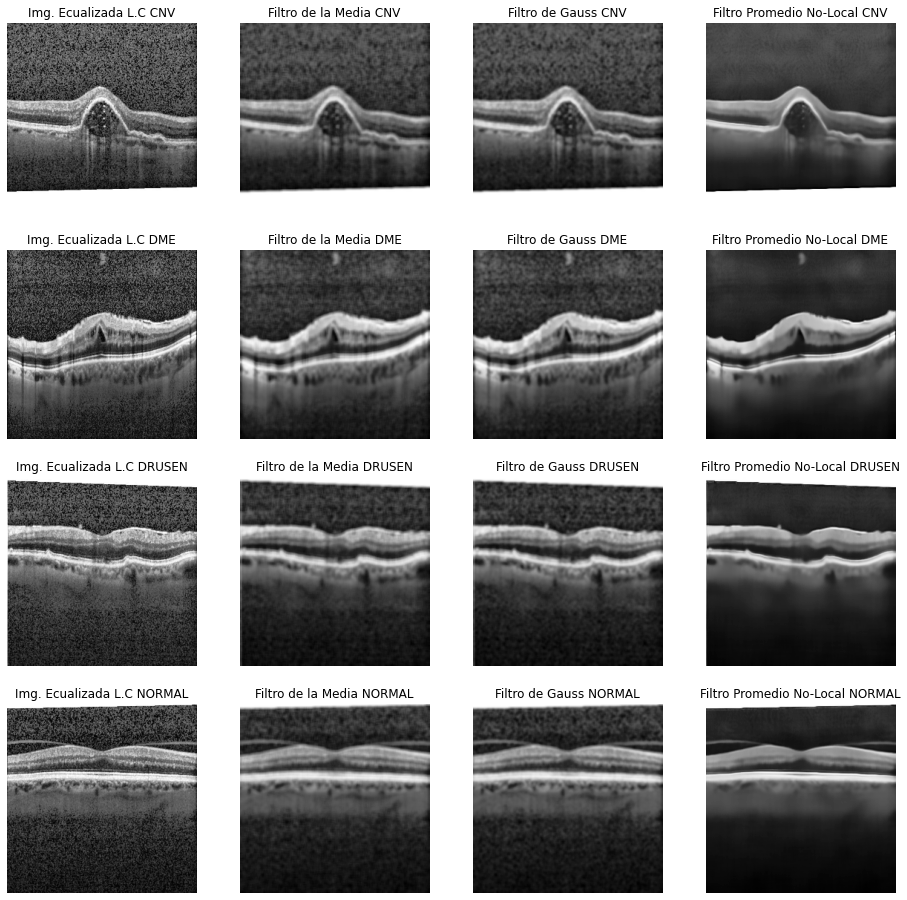

In [ ]:
plot_4x4_disminuir_ruido(img_cnv, img_dme, img_drusen, img_normal)

El filtro que mejor elimina el ruido de la imagen sin distorsionar en mayor medida los elementos de la misma es el filtro de <em><b>promedio no local</b></em>

<b>Resultados preprocesamiento de la imágen</b>

Text(0.5, 1.0, 'Histograma Imágen mejorada ')

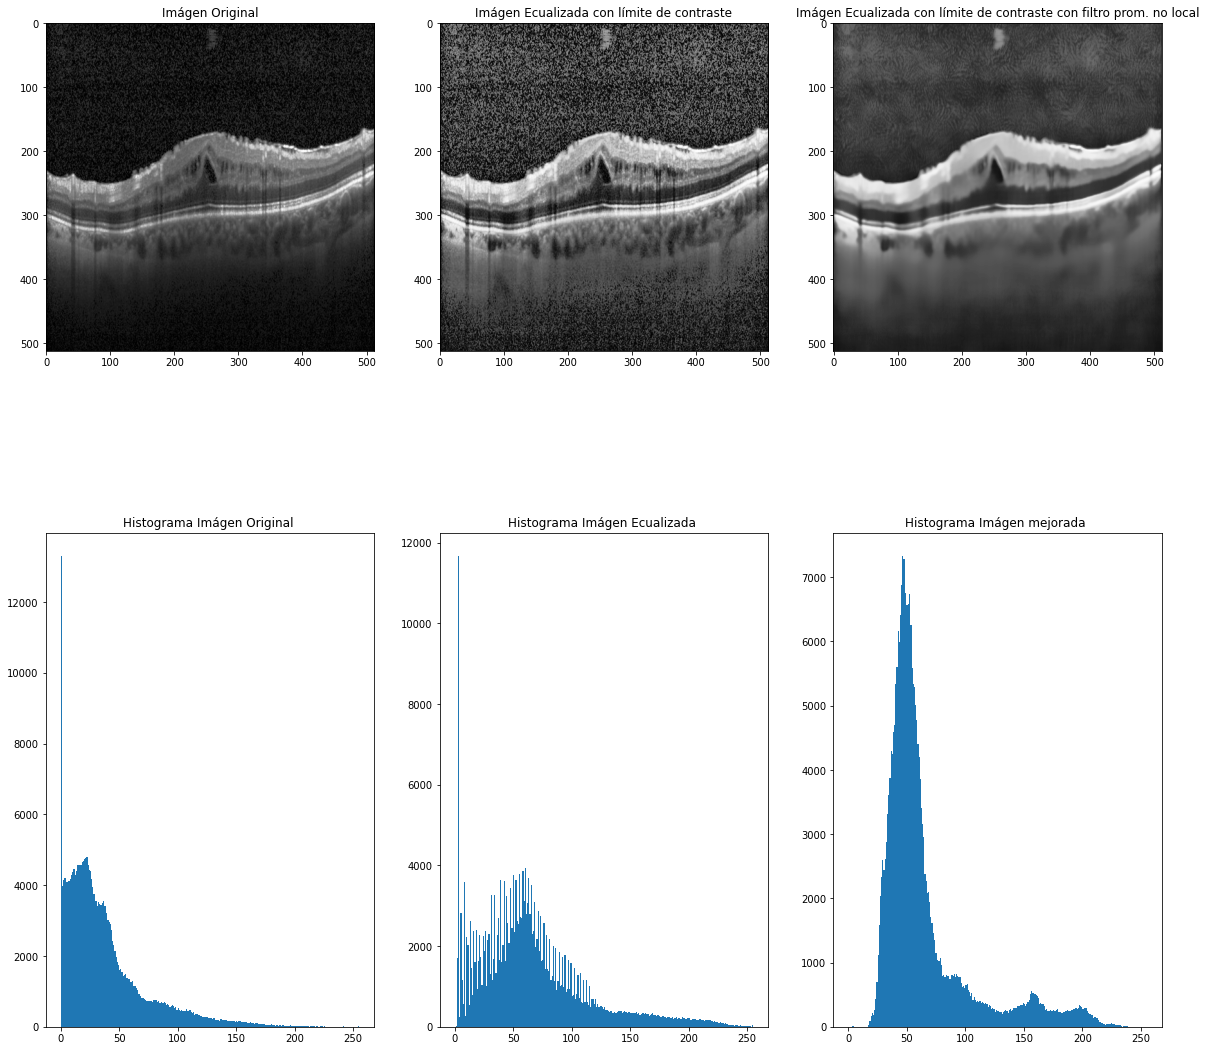

In [ ]:
# Grafico 1x3 para mostrar los resultados que se obtuvieron en el preprocesamiento
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2,3, figsize=(20,20))

#img_cnv= cv2.resize(img_cnv, (256, 256))

plt.title("Resultado de preprocesamiento")
ax1.imshow(img_dme, cmap="Greys_r") # Imágen original
ax1.set_title("Imágen Original")

ax2.imshow(clhe(img_dme), cmap="Greys_r")
ax2.set_title("Imágen Ecualizada con límite de contraste")

ax3.imshow(apply_promedio_no_local(clhe(img_dme)), cmap="Greys_r")
ax3.set_title("Imágen Ecualizada con límite de contraste con filtro prom. no local")

# Histogramas

ax4.hist(img_dme.ravel(), bins=255, range=(0.0, 255.0))
ax4.set_title("Histograma Imágen Original ")

ax5.hist(clhe(img_dme).ravel(), bins=255, range=(0.0, 255.0))
ax5.set_title("Histograma Imágen Ecualizada ")

ax6.hist(apply_promedio_no_local(clhe(img_dme)).ravel(), bins=255, range=(0.0, 255.0))
ax6.set_title("Histograma Imágen mejorada ")


# <b>3. SEGMENTACIÓN</b>

## <b>3.1 EXTRACCIÓN DE BORDES</b>

En la extracción de los bordes de las imágenes se probaron varios filtros, entre ellos:
El filtro la Laplaciana, filtro Sobel, filtro de Prewitt, filtro de Roberts, entre otros

In [ ]:
# Funciones que son útiles en el proceso de extracción de bordes 
def img_scale(img, value_range = [0,255]):
    return (value_range[1] - value_range[0])*(img - np.min(img))/(np.max(img)-np.min(img)) + value_range[0]

def img_trim(img, value_range = [0, 255]):
    res = img.copy()
    res[res > 255] = 255
    res[res < 0] = 0
    return res

def img_scale(img, value_range = [0,255]):
    return (value_range[1] - value_range[0])*(img - np.min(img))/(np.max(img)-np.min(img)) + value_range[0]

### <em><b>3.1.1. Filtro Laplaciano</b></em>
Un filtro laplaciano  calcula las segundas derivadas de una imagen, midiendo la velocidad a la que cambian las primeras derivadas. Esto determina si un cambio en los valores de los píxeles adyacentes se debe a un borde o una progresión continua. Es muy útil para detectar y resaltar bordes.


In [ ]:
def apply_laplacian_filter(img):
  mask1 = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])

  mask2 = np.ones([5,5])
  mask2 = mask2 * -1
  mask2[2,2] = 24
  mask3= np.array([[0,-1,0],
                   [-1,4,-1], 
                   [0,-1,0]])
  
  mask4= np.array([[0,-1,0],
                   [-1,0,-1],
                   [3,-1,3]])
  
  mask5= np.array([[1,-2,1],
                   [-2,4,-2],
                   [1,-2,1]])

  laplace_filtered = cv2.filter2D(img, ddepth = -1, kernel=mask2, borderType = cv2.BORDER_REPLICATE)

  return laplace_filtered


In [ ]:

# Graficar mosaico 4x4 con diferentes variantes del filtro laplaciano

def plot_4x4_filtro_laplaciano(cnv, dme, drusen, normal):

  contador = 1
  plt.figure(figsize=(16,16))
  for i in range(1, 17):
      # Control de las filas del mosaico
      if contador<=4:
        img=cnv
        etiqueta= "CNV"
      elif contador<=8:
        img= dme
        etiqueta= "DME"
      elif contador<=12:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"
        
      img = cv2.resize(img, (256, 256))

      # Control de las columnas del mosaico

      if i in (1, 5, 9, 13):
        plt.subplot(4, 4, i)
        plt.imshow(img, cmap="Greys_r")  # Graficando imágen original (col 1)
        plt.title("Imagen Original {}". format(etiqueta))
        plt.axis('off')
    
      elif i in (2, 6, 10, 14):
        k_size= 5
        plt.subplot(4, 4, i)
        plt.imshow(apply_laplacian_filter(img), cmap='Greys_r') # Graficando imagen original  con filtro Laplaciano (col 2)
        plt.title("Img Original con f. Laplaciano")
        plt.axis('off')

      elif i in (3, 7, 11, 15):
        img_ecualizada= apply_promedio_no_local(img)
        plt.subplot(4, 4, i)
        plt.imshow(apply_laplacian_filter(img_ecualizada), cmap="Greys_r") # Graficando imagen ecualizada con filtro Laplaciano (col 3)
        plt.title("f. prom. no-local + f. Laplaciano")
        plt.axis('off')

      else:
        filtrado_no_local_clhe= apply_promedio_no_local(clhe(img))
        plt.subplot(4, 4, i)
        plt.imshow(apply_laplacian_filter(filtrado_no_local_clhe), cmap="Greys_r") # Imagen ecualizada con filtro de promedio no local y Laplaciano
        plt.title("Ecual. + f. Prom. no local + f. Laplaciano")
        plt.axis('off')

      contador=contador+1

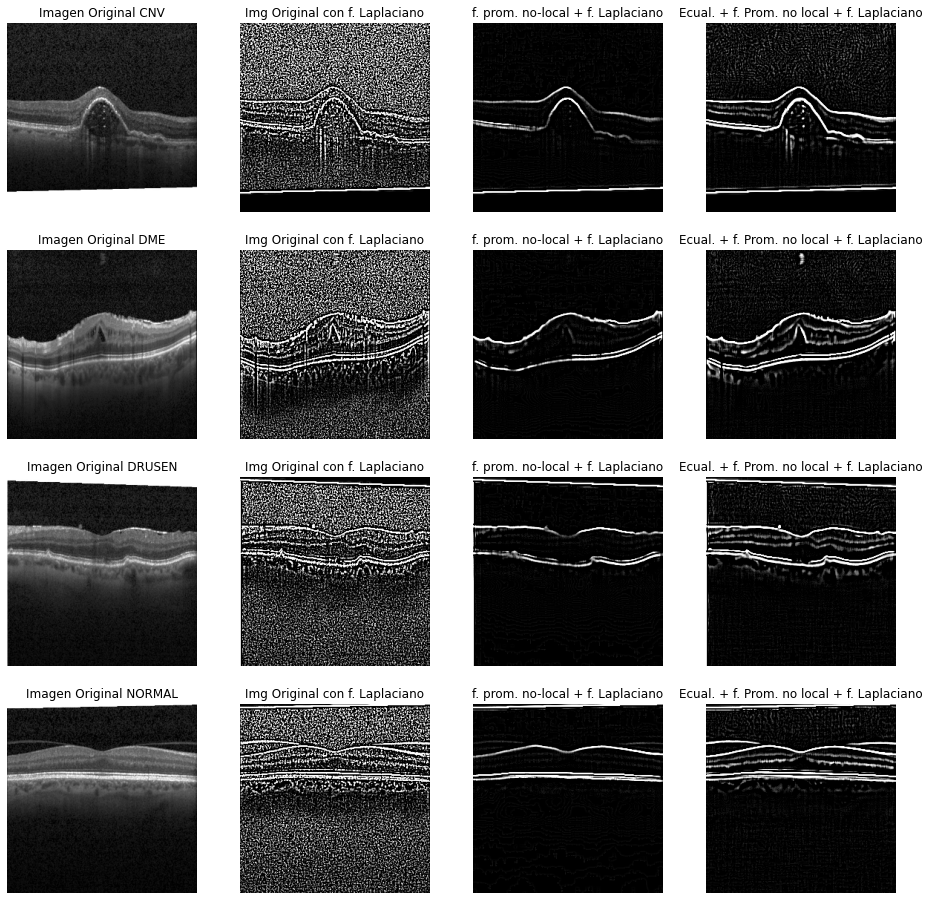

In [ ]:
plot_4x4_filtro_laplaciano(img_cnv, img_dme, img_drusen, img_normal)

### <em><b>3.1.2. Filtro Sobel</b></em>

El operador de Sobel es un operador que calcula una aproximación del gradiente de la imagen en dos direcciones: 'x' y 'y'. 

In [ ]:
def apply_magnitud_sobel(img):

  ksize = 3
  img_float= img.astype(np.float32)
  gradiente_x = cv2.Sobel(img_float,-1,1,0,ksize=3)
  gradiente_y = cv2.Sobel(img_float,-1,0,1,ksize=3)

  gradiente= np.sqrt(np.power(gradiente_x, 2) + np.power(gradiente_y, 2))

  return gradiente

In [ ]:
# Se grafica un mosaico de imágenes 4x4 en donde se observan variantes del filtro Sobel en las imágenes 
def plot_4x4_magnitud_sobel(cnv, dme, drusen, normal):

  contador = 1
  plt.figure(figsize=(16,16))
  
  for i in range(1, 17):
      # Control de las filas del mosaico de imágenes
      if contador<=4:
        img=cnv
        etiqueta= "CNV"
      elif contador<=8:
        img= dme
        etiqueta= "DME"
      elif contador<=12:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"
        
      img = cv2.resize(img, (256, 256))
      # Control de las columnas del mosaico 
      if i in (1, 5, 9, 13):
        plt.subplot(4, 4, i)
        plt.imshow(img, cmap="Greys_r")
        plt.title("Imagen Original".format(etiqueta))
        plt.axis('off')
      elif i in (2, 6, 10, 14):
        k_size= 5

        plt.subplot(4, 4, i)
        plt.imshow(apply_magnitud_sobel(img), cmap='Greys_r')
        plt.title("Img. Original + Sobel")
        plt.axis('off')

      elif i in (3, 7, 11, 15):
        filtrado_no_local= apply_promedio_no_local(img)
        plt.subplot(4, 4, i)
        plt.imshow(apply_magnitud_sobel(filtrado_no_local), cmap="Greys_r")
        plt.title("f. Prom. no local + Sobel")
        plt.axis('off')

      else:
        filtrado_no_local_clhe= apply_promedio_no_local(clhe(img))
        plt.subplot(4, 4, i)
        plt.imshow(apply_magnitud_sobel(filtrado_no_local_clhe), cmap="Greys_r")
        plt.title("f. Prom. no local + Ecual. + Sobel")
        plt.axis('off')

      contador=contador+1

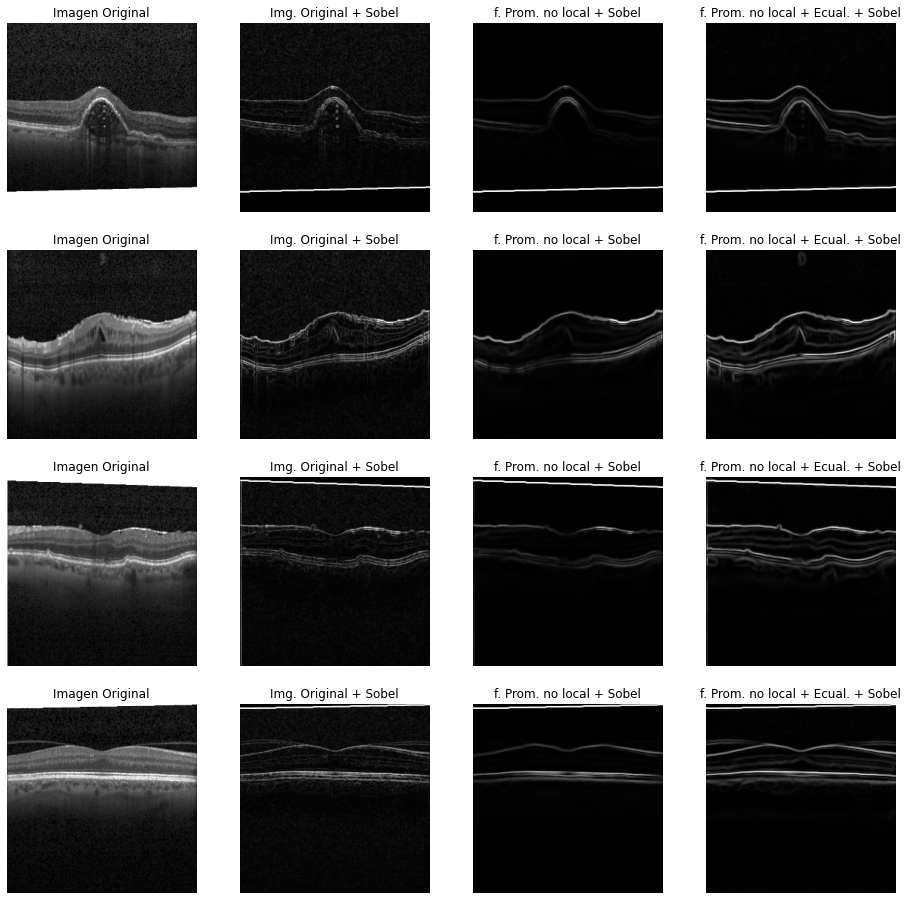

In [ ]:
plot_4x4_magnitud_sobel(img_cnv, img_dme, img_drusen, img_normal)

Probamos diferentes filtros basados en la primera derivada, tal como los filtros de Prewitt, Frei-Chen, Scharr, Roberts. De estos con el que se obtuvo un mejor realce de los rasgos de las imágenes fue con el filtro de Prewitt. Mostrado a continuación 

###<em><b>3.1.3. Filtro de Prewitt </b></em>
El operador de Prewitt estan basados en la estimación del módulo del gradiente usando máscaras 3x3. Los dos operadores, en la dirección del eje x y en la dirección del eje y son:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/89e0951634f88eb18d06923df71e89eb83e7fff3">

In [ ]:
import math
def apply_prewitt(img):
    
    img= img.astype(np.float32)
    #Máscaras para los filtros 
    prewitt_x=np.array([[-1,0,1],
                       [-1,0,1],
                       [-1,0,1]],dtype=int)


    prewitt_y=np.array([[-1,-1,-1],
                       [0,0,0],
                       [1,1,1]],dtype=int)
    
    frei_chen_x=np.array([[-1,0,1],
                       [-math.sqrt(2),0,math.sqrt(2)],
                       [-1,0,1]],dtype=float)


    frei_chen_y=np.array([[-1,-math.sqrt(2),-1],
                       [0,0,0],
                       [1,math.sqrt(2),1]],dtype=float)
    
    scharr_x=np.array([[-3,0,3],
                       [-10,0,10],
                       [-3,0,3]],dtype=int)


    scharr_y=np.array([[-3,-10,-3],
                       [0,0,0],
                       [3,10,3]],dtype=int)
    
    roberts_cross_y = np.array( [[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]] )

    roberts_cross_x = np.array( [[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]] )



    imgc1 = cv2.filter2D(img, ddepth=-1, kernel=prewitt_x) # Se aplica la convolución en X
    imgc2 = cv2.filter2D(img, ddepth=-1, kernel= prewitt_y) # Se aplica la convolución en Y

    #Calcular la magnitud 
    magnitud_prewitt = np.sqrt(np.power(imgc1,2)+np.power(imgc2,2))

    #Escalar los datos
    magnitud_prewitt = img_scale(magnitud_prewitt)
    
    return magnitud_prewitt

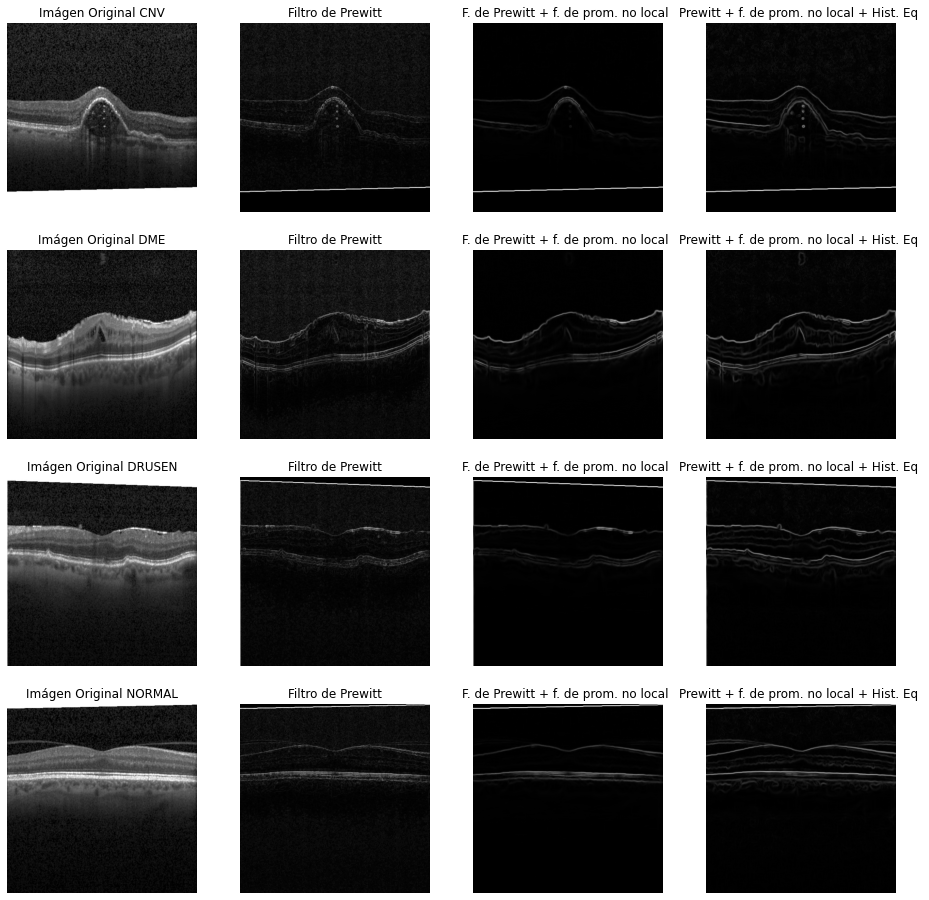

In [ ]:

def plot_4x4_filtro_prewitt(cnv, dme, drusen, normal):

  contador = 1
  plt.figure(figsize=(16,16))
  for i in range(1, 17):
      if contador<=4:
        img=cnv
        etiqueta= "CNV"
      elif contador<=8:
        img= dme
        etiqueta= "DME"
      elif contador<=12:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"  
      img = cv2.resize(img, (500, 500))

      if i in (1, 5, 9, 13):
        plt.subplot(4, 4, i)
        plt.imshow(img, cmap="Greys_r")
        plt.title("Imágen Original {}".format(etiqueta))
        plt.axis('off')
        
      elif i in (2, 6, 10, 14):
        plt.subplot(4, 4, i)
        plt.imshow(apply_prewitt(img), cmap='Greys_r')
        plt.title("Filtro de Prewitt")
        plt.axis('off')

      elif i in (3, 7, 11, 15):
        filtrado_no_local= apply_promedio_no_local(img)
        plt.subplot(4, 4, i)
        plt.imshow(apply_prewitt(filtrado_no_local), cmap="Greys_r")
        plt.title("F. de Prewitt + f. de prom. no local ")
        plt.axis('off')

      else:
        filtrado_no_local_clhe= apply_promedio_no_local(clhe(img))
        plt.subplot(4, 4, i)
        plt.imshow(apply_prewitt(filtrado_no_local_clhe), cmap="Greys_r")
        plt.title("Prewitt + f. de prom. no local + Hist. Eq ")
        plt.axis('off')

      contador=contador+1
    
plot_4x4_filtro_prewitt(img_cnv, img_dme, img_drusen, img_normal)

Comparando los diferentes filtros aplicados en la extracción de los bordes

Text(0.5, 1.0, 'Filtro de Prewitt')

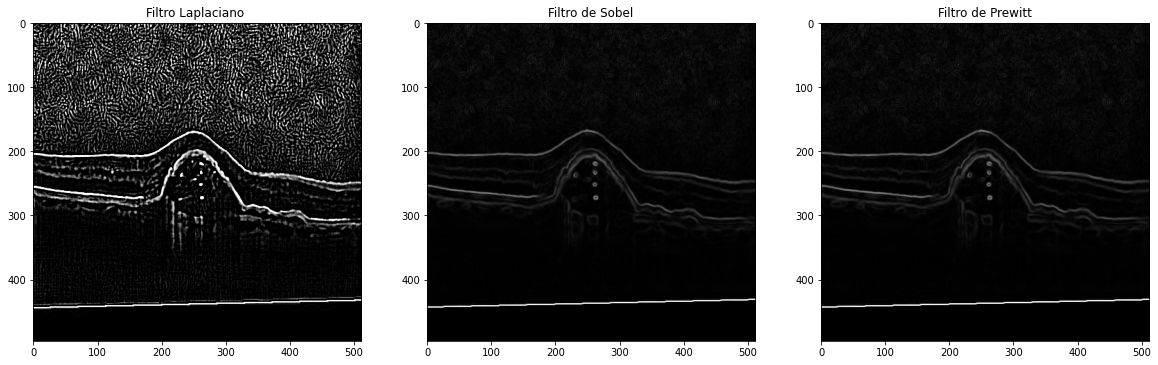

In [ ]:
fig, (ax1, ax2, ax3)= plt.subplots(1,3, figsize=(20,20))

img_mejorada= apply_promedio_no_local(clhe(img_cnv))

ax1.imshow(apply_laplacian_filter(img_mejorada), cmap="Greys_r")
ax1.set_title("Filtro Laplaciano ")
ax2.imshow(apply_magnitud_sobel(img_mejorada), cmap="Greys_r")
ax2.set_title("Filtro de Sobel")
ax3.imshow(apply_prewitt(img_mejorada), cmap="Greys_r")
ax3.set_title("Filtro de Prewitt")




El filtro que se seleccionó para realizar la segmentación de las imágenes fue el filtro de Prewiit, ya que debido a la heterogeneidad de las imágenes se notó que este filtro provee una mayor uniformidad en los elementos separados y genera una segmentación más limpia que los otro filtros probados.

## <b>3.2 BINARIZACIÓN</b>

In [ ]:
import skimage
import skimage.io
import skimage.morphology as morph

# Eliminar pequeños objetos en la imágen
def delete_defects(img):
  objetos_pequenos_eliminados = morph.remove_small_objects(img, min_size = 2000, connectivity = 1)
  return objetos_pequenos_eliminados
# Graficar mosaico de imágenes con el resultado de la binarización de las imágenes

def plot_4x2_binarizacion_cleaned(cnv, dme, drusen, normal):

  contador = 1
  plt.figure(figsize=(17,17))
  
  for i in range(1, 13):
      # Control de las filas
      if contador<=3:
        img=cnv
        etiqueta= "CNV"
      elif contador<=6:
        img= dme
        etiqueta= "DME"
      elif contador<=9:
        img= drusen
        etiqueta= "DRUSEN"
      else:
        img= normal
        etiqueta= "NORMAL"  
        
      #img = cv2.resize(img, (256, 256))

      umbral_2= 4

      # Control de las columnas
      if i in (1,4,7,10):
        plt.subplot(4, 3, i)
        plt.imshow(img, cmap="Greys_r") # Imágenes Originales
        plt.title("Imágen Original {}".format(etiqueta))
        plt.axis('off')

      elif i in (2, 5, 8, 11):
        plt.subplot(4, 3, i)
        img_filtrada = apply_promedio_no_local(img)
        plt.imshow(apply_prewitt(img_filtrada) > umbral_2, cmap='Greys_r') 
        plt.title("Imágen binarizada {}".format(etiqueta)) 
        plt.axis('off')

      else:
        plt.subplot(4, 3, i)
        img_filtrada = apply_promedio_no_local(img)
        plt.imshow(delete_defects(apply_prewitt(img_filtrada) > umbral_2), cmap='Greys_r') 
        plt.title("Imágen binarizada más limpia {}".format(etiqueta)) 
        plt.axis('off')
      
      contador=contador+1


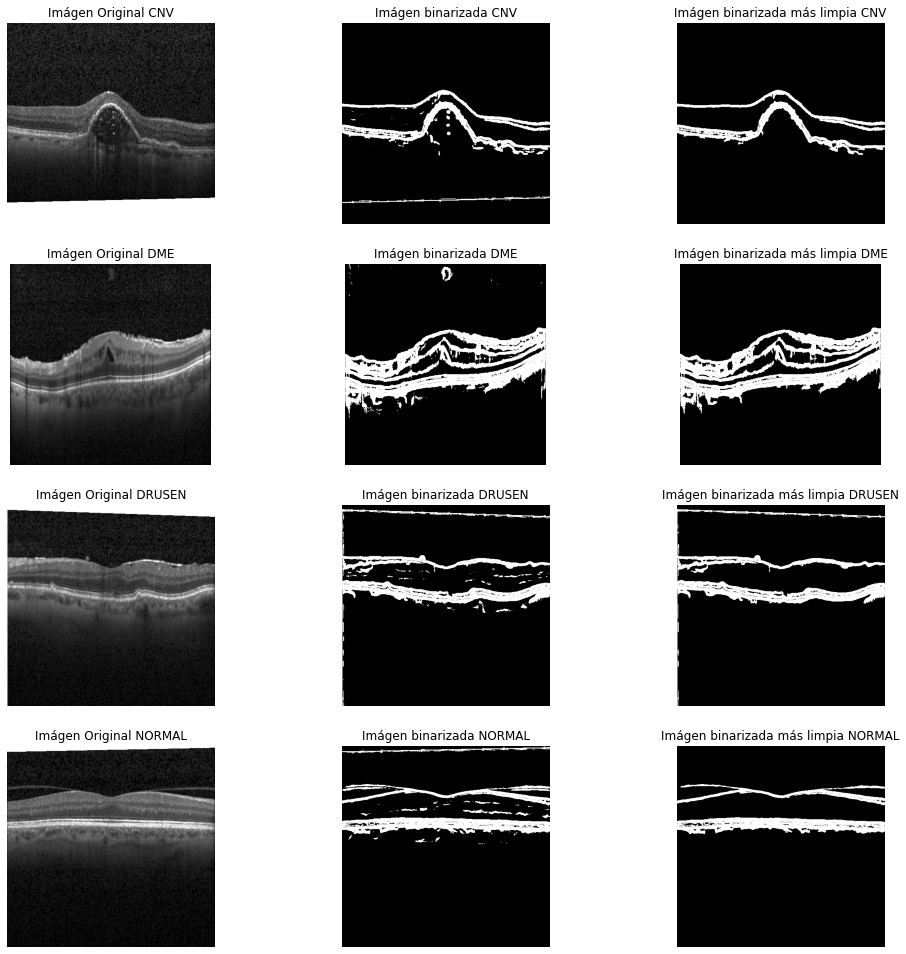

In [ ]:
plot_4x2_binarizacion_cleaned(img_cnv, img_dme, img_drusen, img_normal)

### A modo de resumen de preprocesamiento y segmentación:

<img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/img_normal.PNG"> <img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/flecha_derecha.png" width="100"><img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/img_cleh.PNG"> <img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/flecha_derecha.png" width="100"> <img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/img_ruido.PNG"> <img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/flecha_derecha.png" width="100"><img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/img_prewit.PNG"><img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/flecha_derecha.png" width="100"> <img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/img_bin.PNG"> <img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/flecha_derecha.png" width="100"><img src="https://judhenaoma.github.io/Coursera_HTML_CSS_JS/vision_artificial/img_limpia.PNG">


# <b>CONCLUSIÓN: </b>

Dado el desconocimiento en la clasificación de las imágenes de Tomografía de Coherencia óptica, tarea para el cuál es requerido un profesional entrenado y con experiencia, no disponemos de criterios precisos para separar los elementos de las imágenes que nos permita una posterior clasificación en las 4 categorías de enfermedades correspondientes. Sin embargo, exploramos con los algoritmos vistos hasta ahora en el curso y notamos que estos son una buena herramienta para extraer la forma de las imágenes, pero los elementos interiores que son de interés son difíciles de separar. 
Por esta razón  acudimos a algoritmos más robustos como lo son las Redes Neuronales Convolucionales.


#<b>4. RED NEURONAL CONVOLUCIONAL PARA CLASIFICACIÓN DE IMÁGENES</b>

Para este proceso Google proporciona herramienta muy valiosa llamada TensorFlow que permite mediante la libreria Keras poder crear estructuras de red neuronal de manera sencilla. Como primer paso debemos selecionar la versión de TensorFlow a usar, nosotros seleccionamos la version 1.15.2 pues ya tenemos experiencia previa trabajando con ella.

In [ ]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


A continuación importamos algunas librerias necesarias, tanto para manejar archivos en carpetas, preprocesar y generar nuestro modelo.

In [ ]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.python.keras import backend as K

In [ ]:

base_dir = os.path.join("/content/OCT2017 /train")
print("Carpetas Entreno--> ", os.listdir(base_dir))
base_dir = os.path.join("/content/OCT2017 /test")
print("Carpetas Testeo--> ", os.listdir(base_dir))


Carpetas Entreno-->  ['NORMAL', 'CNV', 'DME', 'DRUSEN']
Carpetas Testeo-->  ['NORMAL', 'CNV', 'DME', 'DRUSEN']


###<b>4.1. ¿Qué es una red neuronal?</b>

Las redes neuronales son una rama del Machine Learning las cuales han tenido un fuerte impacto en el desarrollo tecnologico de los ultimos años, permitiendo desarrollar aplicaciones como el reconocimiento de rostros, conducción autonoma entre otras.

Estos algoritmos reciben el nombre de redes neuronales pues estan inspirados en la arquitectura del cerebro humano, donde una neurona esta conectada a varias, entonces si esta recibe un estimulo electrico que la active esta envia un impulso electrico a las demas neuronas conectadas a ella, por el contrario sino se activa no envia ningun estimulo a las demas.

Las redes neuronales estan compuestas por diferentes capas, en la estructura mas sencilla estas constan de 3. La primera capa es denominada como capa de entrada, esta es la encargada de recibir la información y enviarla a las demas capas. Posteriormente tenemos la capa oculta que en la red mas simple es una capa, pero pueden llegar a ser decenas o miles, dependiendo del problema que se este trabajando, estas capas son las encargadas del aprendizaje de nuestra red neuronal. Por ultimo se tiene la capa de salida, esta capa recibe la información de las capas ocultas, asi decide y nos entrega un resultado.

Cada una de las capas anteriormente descritas esta compuesta por neuronas, y cada una de estas neuronas esta conectada a todas las neuronas de la siguiente capa, asi entonces la capa de entrada entrega la información a las capas ocultas, las cuales a su vez entregan información mucho mas refinada a la capa de salida, la que nos entrega un resultado. El secreto de las redes neuronales es que este proceso se repite mucas veces, haciendo que nuestra red aprenda.

Para entender mejor el proceso de aprendizaje debemos entender como funciona una neurona dentro de la red. Una sola neurona recibe información de las variables 'X' y su peso 'W', el peso se refiere a la importancia de una conexión, por tanto nos ayuda a darle mayor importancia a una conexión sobre otras, tambien dentro de la neurona tenemos un valor denomindado bias 'b' o sesgo, este valor ayuda a que ciertas neuronas se activen con mayor facilidad que otras. Por otra parte dentro de la neurona contamos con una función de activación 'f'.

Para que una neurona decida si envia información o no a las demas aplica la siguiente ecuación sum(W.X)+b, es decir la sumatoria de todas las variables que recibe por su respectivo peso mas el sesgo o bias. Una vez tenemos este resultado, lo enviamos a la función de activación, esta función se encarga de decir que si el resultado es mayor a un umbral definido entonces se envia señal a las siguientes capas o si por el contrario es menor, entonces no envia nada.La salida de esa neurona se convierte en la entreada de las neuronas de las siguiente capa.

Ahora que sabemos como funciona una neurona podemos explicar como funciona toda una red. Basucamente la capa de entrada envia información a las capas ocultas las cuales e encargan de decidir con su función de activación si se envia información a la capa de salida o no, la cual recibe la información que se le otorga y nos entrega este resultado. Una vez se tiene el resultado se pasa a comparar contra lo que se esperaba que fuera el resultado para ver que tan acertada es la red, es decir que tanto error se tiene, sino se aprendio bien, es decir se tiene un error considerable, entonces se pasa a una nueva iteración, donde se corrigen los valores de bias, de X y de W.

Para saber que tan grande es el error se utilizan ecuaciones como el error cuadratico medio u otras que nos permiten saber que tan equivocada esta nuestra red, una vez se tiene este error entonces se pasa a elegir nuevos parametros (b,X,W), esto con el fin de mejorar el performance de nuestra red, para esto utilizamos un mecanismo llamado gradiente descendiente, lo que buscamos con este mecanismo es encontrar el minimo global de nuestra función de error. Esto se logra mediante derivadas, primero se hace la derivada en el lugar de la primera iteración, alli tenemos el valor de la pendiente y por tanto el algoritmo sabra hacia donde se tiene que mover para llegar al minimo global, este proceso se hace muchas veces, por tanto el algoritmo va a ir llendo lentamente hacia el minimo global pasando por muchos minimos locales, esto se hace cambiando los valores de b, X y W para ir minimizando el error.

Una vez alcanzamos el minimo global, entonces tenemos valores de error muy bajos y podemos empezar a generar predicciones. Para generar predicciones no se hace nada de lo anterior, sino que simplemente ya tenemos una red con todas sus conexiones definidas, es decir sus parametros b, X y W definidos en cada neurona.

###<b>4.2. Redes Neuronales Convolucionales</b>

las redes neuronales convolusionales son un tipo de red muy utilizada en el tratamiento de imagenes, si bien en el ultimo tiempo tambien tienen aplicaciones en el tratamiento de texto, video y otros problemas, su principal uso y potencial esta en la visión artificial.

Estas redes al igual que otras estan compuestas por capas. La capa de entrada se encarga de recibir los pixeles de la imagen y posteriormente las neuronas se conectaran con las capas ocultas, dentro de nuestras capas ocultas que son las encargadas del aprendizaje tendremos 2 operaciones muy importantes, la primera es el pooling, que basicamente es una operación que se usa para reducir el tamaño de nuestra imágen y asi cuando se pase a las siguientes capas, la imágen sea mas pequeña y el procesamiento sea mas rapido. La otra operación y la mas importante es la convolusión, las convolusiones se pueden entender como pasar muchos filtros por nuestra imágen buscando identificar patrones.

Se usan para imagenes sobre las redes normales debido a que si usaramos una red normal tendriamos muchos parametros, pues por cada pixel se generaria una neurona que a su vez se conectaria a la siguiente capa sin reducor ninguna dimensión, por otra parte tendriamos problemas para identificar los objetos cuando se cambian de posición en las imagenes. Las redes convolusionales en vez de procesar todos los pixeles de la imagen, tiene capas que sacan las principales caracteristicas, es como ir procesando parches de la imagen, por tanto computacionalmente son mucho mas rapidas. estas convoluciones cada vez van generando imagenes con menos alto y largo pero con mayor profundidad. Por su parte la operación pooling reduce aun mas la altura y el largo pero deja la profundidad igual.



Para aplicar una red convolusonal se usan algunos parametros importantes:

1) tamaño de filtro, es el tamaño de la matriz que hacemos que recorra toda la imagen.

2)la profundidad, que corresponde al numero de filtros que aplicamos a la imagen, por consiguiente a medida que aplicamos convolusiones la profundidad de la imagen aumenta, cada uno de estos filtros identifica caracteristicas especiales de la imagen, como bordes, sombras y demas patrones interesantes.

3) el paso, esto es basicamente que tanto vamos a ir pasando el filtro por la imagen, puede ser pixel a pixel u otra velocidad que prediramos.

Por otra parte se tiene en cuenta la operación de pooling que puede ser de 2 formas:

1) maxpooling, basicamente es pasar un filtro de un determinado tamaño por la imagen y en cada paso elige el numero mas grande de los que abarca.

2) avgpooling, basicamente es pasar un filtro de un determinado tamaño por la imagen y en cada paso elige el promedio de los numeros que abarca.


Ademas de tener las capas de pooling y de convolusiones, al final de toda red neuronal se añade una capa clasificadora totalmente conectada que nos proporciona el resultado final.

In [ ]:
import numpy as np
#definimos los directorios
datos_entreno='/content/OCT2017 /train'
datos_validacion='/content/OCT2017 /test'

#definimos los parametros
epocas= 32 #veces que vamos a iterar
altura,longitud= 128,128 #estandarización de las imagenes (Tamaño)
batch_size=32 #Tamaño de lotes de imagenes
pasos= 512 #numero de lotes que debe tomar la red para condiderar que se entreno una epoca
pasos_validacion= 128 #pasos por epoca con las imagenes de validación
clases=4 #categorias



### <b>4.3. Data Augmentation</b>


La idea principal de la Data Augmentation es aumentar el número de ejemplos que le podemos proporcionar a la red neuronal, esto lo logramos mediante operaciones como las que hemos visto anteriormente en clase, es decir rotaciones, recortes, zooms y demas.

Sin embargo no debe entenderse esto como la adición de las imagenes originales y las imagenes modificadas, sino mas bien, en tomar lotes de las imagenes originales, transformarlas aleatoreamente de acuerdo a las indicaciones dadas y postriormente a entrenar el modelo con las nuevas imegenes, esto se hace con el fin de generalizar mucho mas nuestro modelo, por tanto eso suele ocasionar que el modelo baje su precisión con los datos de entrenamiento pero aumente su precisión con los datos de testeo.

In [ ]:
#Preprocesamiento
#Creamos nuestros generadores de imagenes
entreno_datagen=ImageDataGenerator(
    rescale=1./255, #Es para hacer que todos los valores de pixeles esten de cero a uno 
    rotation_range=40,
    width_shift_range=0.2, # Cambiar el ancho de la imagen en un 20%
    height_shift_range=0.2,# Cambiar la altura de la imagen en un 20%
    shear_range=0.2,       # Rotación a través del eje X en un 20%
    zoom_range=0.2,        # Zoom de imagen en un 20%
    horizontal_flip=True,  #Toma una imagen y la invierte
    fill_mode='nearest'    #rellena la imagen es decir la suaviza
)

#Generador imagenes de entrenamiento
validacion_datagen=ImageDataGenerator(rescale=1./255) #solo reescalamos las imagenes


In [ ]:
#Ahora creamos las imagenes para entrenar
entreno_imagenes=entreno_datagen.flow_from_directory(
    datos_entreno,
    target_size=(altura, longitud),
    batch_size=128, #Tamaño de los lotes de entreno
    class_mode='categorical' #clasificación categorica, es decir a 4 nombres de enfermedades
    )

#Ahora creamos las imagenes para validar
validacion_imagenes=validacion_datagen.flow_from_directory(
    datos_validacion,
    target_size=(altura, longitud),
    batch_size=20,
    class_mode='categorical' #clasificación categorica, es decir a 4 nombres de enfermedades
    )

#esto hace que el generador de imagen entre a nuestras carpetas de entreno y procese cada una


Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


## 4.4 Construcción de la arquitectura

Una vez tenemos las imagenes preprocesadas pasamos a la construcción de la arquitectura de la red, nosotros elegimos la arquitectura mas convencional de redes convolusionales, la cual esta compuesta por una capa de entrada conectada a lotes de compuestos por una capa de convolusión que sirve para extraer caracteristicas y a una capa de pooling que sirve para reducir la dimensión de las imagenes resultantes, nosotros optamos por 4 capas de convolusiones la primera de 32 filtros de 3x3 la segunda de 64 filtros de 3x3 y las ultimas 2 de 128 filtros de 3x3, por tanto al final tendremos que la información tendra una profundidad de 128, para convertir esta información a información plana utilizamos una capa de flatten que convierte los datos a un vector de una sola dimensión para luego aplicar una capa clasificatoria con la función softmax que permite hacer clasificaciones de multiples clases.

Para entender mejor el funcionamiento de nuestra red, debemos hablar de las funciones de activación, las cuales son las encargadas de decidir cuando una red se activa, nosotros utilizamos la función ReLu para todas las capas de convolución, la cual tiene las siguientes caracteristicas:

####ReLU – Rectified Lineal Unit:

La función ReLU transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran.



 

Características de la función ReLU:

Activación Sparse – solo se activa si son positivos.

No está acotada.

Se pueden morir demasiadas neuronas.

Se comporta bien con imágenes.

Buen desempeño en redes convolucionales.

Por otra parte para la capa de salida utilizamos la función softmax, la cual tiene las siguientes caracteristicas:

####Softmax – Rectified Lineal Unit:

La función Softmax transforma las salidas a una representación en forma de probabilidades, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1.

 

Características de la función Softmax:

Se utiliza cuando queremos tener una representación en forma de probabilidades.

Esta acotada entre 0 y 1.

Muy diferenciable.

Se utiliza para para normalizar tipo multiclase.

Buen rendimiento en las últimas capas.

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(4, activation='softmax')
])

Por otra parte debemos seleccionar la función de costo que queremos optimizar, esta función debe ser derivable, pues sobre ella se aplicara el descendo de gradiente, es decir se derivara parcialmente para cada uno de sus componentes, nosotros elegimos usar  "sparse_categorical_crossentropy", pues ha sido usada con exito en muchos problemas de clasificación con varias etiquetas.


Por otra parte tambien debe elegirse un optimizador, este es el encargado de calcular el gradiente para asi encontrar el minimo de la función de costo mas rapidamente, el optimizador clasico es el denominado descenso de gradiente estocastico el cual se limita simplemente a calcular el gradiente negativo de la función de coste, sin embargo para este caso hemos seleccionado el optimizador Amdam debido a que ademas incluye al calculo el momentum, convirtiendolo en una herramienta mas poderosa.

Ademas de esto elegimos la metrica con la cual vamos a evaluar nuestro modelo, nosostros elegimos 'accuracy' que es la precisión, en otras palabras la proporción de imagenes bien clasificadas.


In [ ]:
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

Una vez tenemos estos hiper parametros definidos, pasamos al entrenamiento del modelo, donde ademas configuramos las epocas que vamos a iterar y los pasos por epoca de entrenamiento, es decir que tantos lotes elegira la red para considerar que se entreno una epoca, tanto con las imagenes de entrenamiento como de validación.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit_generator(
      entreno_imagenes,
      steps_per_epoch = 512, 
      epochs = 16,
      validation_data=validacion_imagenes,
      validation_steps =64, 
      callbacks=[callbacks], 
      verbose = 1)

Epoch 1/16
512/512 [==============================] - 498s 973ms/step - loss: 0.7909 - acc: 0.6972 - val_loss: 0.9849 - val_acc: 0.6333
Epoch 2/16
512/512 [==============================] - 455s 889ms/step - loss: 0.5217 - acc: 0.8087 - val_loss: 0.4653 - val_acc: 0.8659
Epoch 3/16
512/512 [==============================] - 465s 909ms/step - loss: 0.3940 - acc: 0.8593 - val_loss: 0.1707 - val_acc: 0.9479
Epoch 4/16
512/512 [==============================] - 451s 881ms/step - loss: 0.3373 - acc: 0.8813 - val_loss: 0.1482 - val_acc: 0.9606
Epoch 5/16
512/512 [==============================] - 429s 839ms/step - loss: 0.3040 - acc: 0.8948 - val_loss: 0.1298 - val_acc: 0.9621
Epoch 6/16
512/512 [==============================] - 427s 834ms/step - loss: 0.2798 - acc: 0.9046 - val_loss: 0.1858 - val_acc: 0.9503
Epoch 7/16
512/512 [==============================] - 427s 834ms/step - loss: 0.2632 - acc: 0.9094 - val_loss: 0.0832 - val_acc: 0.9771
Epoch 8/16
512/512 [============================

In [ ]:
#Guardar modelo como archivo para no entrenar mas
ruta_modelo='/content/modelo'

if not os.path.exists(ruta_modelo):
  os.mkdir(ruta_modelo)
model.save('/content/modelo/modelo.h5')
model.save_weights('/content/modelo/pesos.h5')

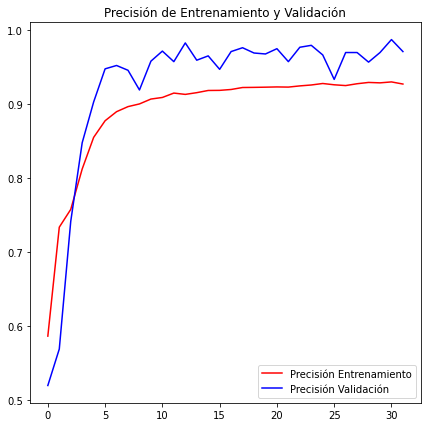

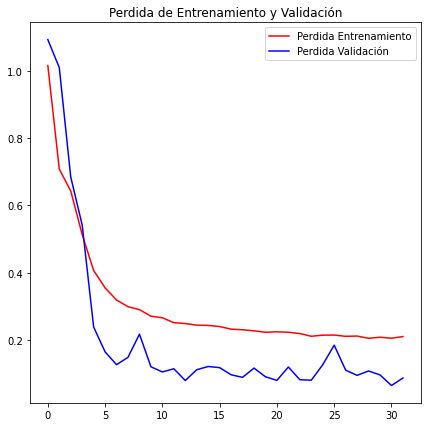

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Precisión Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Perdida Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Perdida Validación')
plt.title('Perdida de Entrenamiento y Validación')
plt.legend()

plt.show()

En conclusión podemos obervar que el modelo de red neuronal clasifica con una precisión del 95% las imagenes de testeo, el cual es un porcentaje bastante bueno, teniendo en cuenta la complejidad de las imagenes.

# <b>BIBLIOGRAFÍA</b>
-Kermany, D. S., Goldbaum, M., Cai, W., Valentim, C. C., Liang, H., Baxter, S. L., ... & Dong, J. (2018). Identifying medical diagnoses and treatable diseases by image-based deep learning. Cell, 172(5), 1122-1131.

-Wang, J., Deng, G., Li, W., Chen, Y., Gao, F., Liu, H., ... & Shi, G. (2019). Deep learning for quality assessment of retinal OCT images. Biomedical Optics Express, 10(12), 6057-6072.

-Wang, Y., Zhang, Y., Yao, Z., Zhao, R., & Zhou, F. (2016). Machine learning based detection of age-related macular degeneration (AMD) and diabetic macular edema (DME) from optical coherence tomography (OCT) images. Biomedical optics express, 7(12), 4928-4940.

-Li, F., Chen, H., Liu, Z., Zhang, X. D., Jiang, M. S., Wu, Z. Z., & Zhou, K. Q. (2019). Deep learning-based automated detection of retinal diseases using optical coherence tomography images. Biomedical Optics Express, 10(12), 6204-6226.

-Koprowski, R., & Wróbel, Z. (2011). Image processing in optical coherence tomography.